In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
#import dataframe from csv file
fb = pd.read_csv('./stocks/facebook.csv',index_col=0)
ms = pd.read_csv('./stocks/microsoft.csv',index_col=0)

In [23]:
fb['MA10'] = fb['Close'].rolling(10).mean()
fb['MA50'] = fb['Close'].rolling(50).mean()
ms['MA10'] = ms['Close'].rolling(10).mean()
ms['MA50'] = ms['Close'].rolling(50).mean()

In [16]:
fb = fb.dropna()
fb.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2015-08-03,20.110001,20.309999,19.850000,20.290001,19.859528,9928300,19.754,20.7302
2015-08-04,20.219999,20.430000,20.139999,20.370001,19.937830,6502500,19.812,20.7204
2015-08-05,20.870001,20.889999,20.540001,20.580000,20.143373,5865700,19.929,20.7174
2015-08-06,20.530001,20.680000,20.110001,20.450001,20.016130,16391900,20.009,20.6896
2015-08-07,22.459999,23.370001,21.879999,22.980000,22.492455,35131200,20.365,20.7064


In [25]:
ms = ms.dropna()
ms.head()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50
Date,,,,,,,,
2015-05-22,47.299999,47.349998,46.820000,46.900002,43.854939,25720600,47.686,44.3644
2015-05-26,46.830002,46.880001,46.189999,46.590000,43.565056,29581900,47.608,44.4686
2015-05-27,46.820000,47.770000,46.619999,47.610001,44.518841,27335600,47.634,44.5896
2015-05-28,47.500000,48.020000,47.389999,47.450001,44.369232,19283700,47.616,44.7046
2015-05-29,47.430000,47.570000,46.590000,46.860001,43.817532,35428100,47.430,44.7918


In [28]:
#Decision
fb['Shares'] = [1 if fb.loc[ei, 'MA10']>fb.loc[ei, 'MA50'] else 0 for ei in fb.index]
ms['Shares'] = [1 if ms.loc[ei, 'MA10']>ms.loc[ei, 'MA50'] else 0 for ei in ms.index]

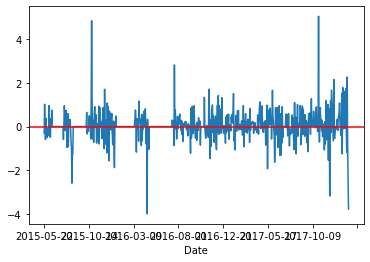

In [49]:
#Microsoft profit
ms['Close1'] = ms['Close'].shift(-1)
ms['Profit'] = [ms.loc[ei, 'Close1'] - ms.loc[ei, 'Close'] if ms.loc[ei, 'Shares']==1 else 0 for ei in ms.index]
ms['Profit'].plot()
plt.axhline(y=0, color='red')

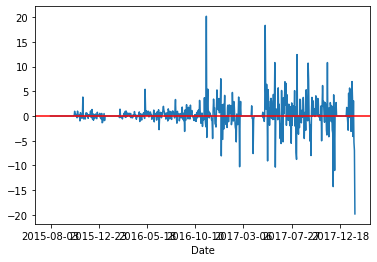

In [48]:
#Facebook profit
fb['Close1'] = fb['Close'].shift(-1)
fb['Profit'] = [fb.loc[ei, 'Close1'] - fb.loc[ei, 'Close'] if fb.loc[ei, 'Shares']==1 else 0 for ei in fb.index]
fb['Profit'].plot()
plt.axhline(y=0, color='red')


In [46]:
#Display model performance for FB
fb['wealth'] = fb['Profit'].cumsum()
fb.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,
2018-01-30,241.110001,246.419998,238.410004,242.720001,242.720001,14270800,235.692003,210.030001,1,245.800003,3.080002,180.640012
2018-01-31,245.770004,249.270004,244.449997,245.800003,245.800003,11964400,237.800003,210.713801,1,240.500000,-5.300003,175.340009
2018-02-01,238.520004,246.899994,238.059998,240.500000,240.500000,12980600,239.406003,211.296601,1,233.520004,-6.979996,168.360013
2018-02-02,237.000000,237.970001,231.169998,233.520004,233.520004,17961600,239.747003,211.685401,1,213.699997,-19.820007,148.540006
2018-02-05,227.000000,233.229996,205.000000,213.699997,213.699997,28869000,237.748003,211.638401,1,NaN,NaN,NaN


In [50]:
#Display model performance for MS
ms['wealth'] = ms['Profit'].cumsum()
ms.tail()

,Open,High,Low,Close,Adj Close,Volume,MA10,MA50,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,
2018-01-30,93.300003,93.660004,92.099998,92.739998,92.306389,38635100,91.862,86.5244,1,95.010002,2.270004,31.510006
2018-01-31,93.750000,95.400002,93.510002,95.010002,94.565781,48756300,92.349,86.7606,1,94.260002,-0.750000,30.760006
2018-02-01,94.790001,96.070000,93.580002,94.260002,93.819290,47227900,92.765,86.9978,1,91.779999,-2.480003,28.280003
2018-02-02,93.639999,93.970001,91.500000,91.779999,91.350883,47867800,92.943,87.1828,1,88.000000,-3.779999,24.500004
2018-02-05,90.559998,93.239998,88.000000,88.000000,87.588554,51031500,92.582,87.2684,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you win is 148.540006')

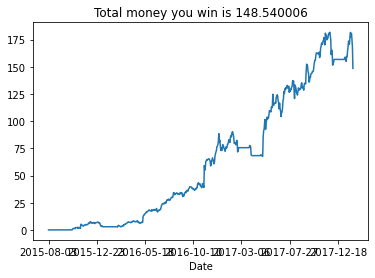

In [51]:
#plot the wealth for FB
fb['wealth'].plot()
plt.title('Total money you win is {}'.format(fb.loc[fb.index[-2], 'wealth']))


Text(0.5, 1.0, 'Total money you win is 24.50000399999999')

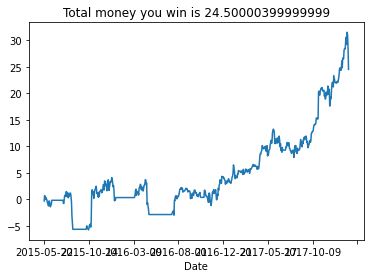

In [53]:
#plot the wealth for MS
ms['wealth'].plot()
plt.title('Total money you win is {}'.format(ms.loc[ms.index[-2], 'wealth']))
